In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *
from scipy import stats
from numpy.linalg import multi_dot
#pip install cufflinks
#import cufflinks as cf
#cf.set_config_file(offline=True, dimensions=((1000,600)))

In [19]:
# Nasdaq-listed stocklist
symbols = ['NVDA', 'AAPL', 'JPM','AMZN', 'CAT', 'WMT', 'BA', 'JNJ', 'MCD', 'UNH', 'VZ', 'V', 'GS', 'EA', 'NFLX', 'SBUX', 'TSLA', 'ASML', 'CVX']

# Number of assets
numofasset = len(symbols)

# Number of portfolio for optimization
numofportfolio = 5000

#Retrieve Data
df = pd.read_excel('D:\\Quant_Research_2\\US_equity_data.xlsx', sheet_name='Price',  index_col=0, parse_dates=True)
df

,NVDA,AAPL,JPM,AMZN,CAT,WMT,BA,JNJ,MCD,UNH,VZ,V,GS,EA,NFLX,SBUX,TSLA,ASML,CVX
Date,,,,,,,,,,,,,,,,,,,
2016-11-29,23.3125,27.8650,78.92,38.1260,94.04,71.37,151.64,112.48,120.68,157.59,50.960,79.15,211.75,81.370,117.51,58.17,12.637987,103.79,109.34
2016-11-30,23.0500,27.6300,80.17,37.5285,95.56,70.43,150.56,111.30,119.27,158.32,49.900,77.32,219.29,79.240,117.00,57.97,12.626654,103.13,111.56
2016-12-01,21.9100,27.3725,81.79,37.1825,96.24,70.67,152.39,111.38,118.47,160.94,49.870,75.43,226.63,75.580,117.22,58.51,12.125321,99.99,113.29
2016-12-02,22.1125,27.4750,81.60,37.0170,95.14,70.88,152.25,111.96,118.24,160.73,49.810,75.72,223.36,75.860,120.81,57.21,12.097988,99.78,113.00
2016-12-05,22.9700,27.2775,83.26,37.9680,94.45,69.94,152.16,111.94,119.29,157.63,49.750,77.31,228.55,77.450,119.16,57.50,12.453321,102.92,113.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,682.2300,189.3000,175.10,169.1500,322.72,169.81,208.58,158.06,284.65,510.67,41.100,276.76,384.99,135.260,555.88,95.67,185.100000,904.89,152.35
2024-02-07,700.9900,189.4100,175.43,170.5300,323.59,169.38,211.92,157.98,287.33,519.39,40.420,279.39,386.66,136.750,559.30,95.31,187.580000,922.23,152.13
2024-02-08,696.4100,188.3200,174.80,169.8400,322.00,169.37,209.22,156.40,291.93,520.09,39.910,275.78,385.04,138.850,558.53,96.59,189.560000,922.94,154.06


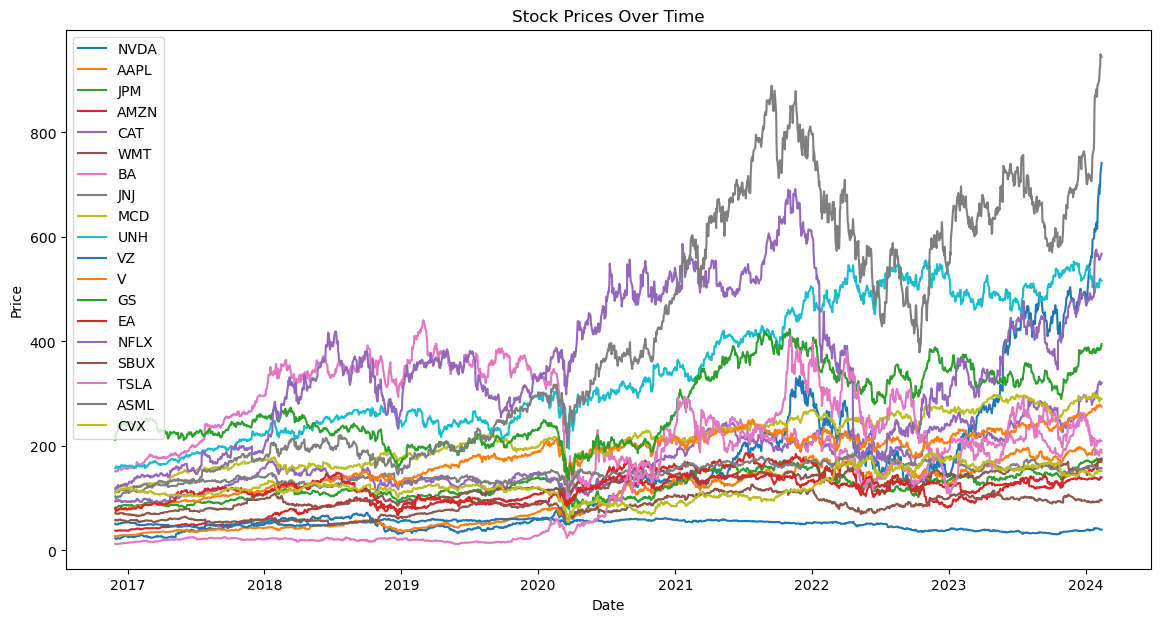

In [20]:
# Plot 
# Assuming 'df' is a pandas DataFrame with datetime index and stock symbols as columns
# and you want to plot the prices over time

# Plot all columns in the DataFrame
plt.figure(figsize=(14, 7))  # Set the figure size
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()  # Add a legend to display the symbols
plt.show()

In [21]:

# Calculate returns 
returns = df.pct_change().fillna(0)
returns


,NVDA,AAPL,JPM,AMZN,CAT,WMT,BA,JNJ,MCD,UNH,VZ,V,GS,EA,NFLX,SBUX,TSLA,ASML,CVX
Date,,,,,,,,,,,,,,,,,,,
2016-11-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-11-30,-0.011260,-0.008434,0.015839,-0.015672,0.016163,-0.013171,-0.007122,-0.010491,-0.011684,0.004632,-0.020801,-0.023121,0.035608,-0.026177,-0.004340,-0.003438,-0.000897,-0.006359,0.020304
2016-12-01,-0.049458,-0.009320,0.020207,-0.009220,0.007116,0.003408,0.012155,0.000719,-0.006707,0.016549,-0.000601,-0.024444,0.033472,-0.046189,0.001880,0.009315,-0.039704,-0.030447,0.015507
2016-12-02,0.009242,0.003745,-0.002323,-0.004451,-0.011430,0.002972,-0.000919,0.005207,-0.001941,-0.001305,-0.001203,0.003845,-0.014429,0.003705,0.030626,-0.022218,-0.002254,-0.002100,-0.002560
2016-12-05,0.038779,-0.007188,0.020343,0.025691,-0.007252,-0.013262,-0.000591,-0.000179,0.008880,-0.019287,-0.001205,0.020998,0.023236,0.020960,-0.013658,0.005069,0.029371,0.031469,0.002212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,-0.015995,0.008632,0.003438,-0.006811,0.004107,0.006818,0.009437,0.014506,-0.004616,0.015329,-0.006767,0.004282,0.005143,0.002371,-0.010995,0.034158,0.022313,0.007067,0.000131
2024-02-07,0.027498,0.000581,0.001885,0.008158,0.002696,-0.002532,0.016013,-0.000506,0.009415,0.017076,-0.016545,0.009503,0.004338,0.011016,0.006152,-0.003763,0.013398,0.019163,-0.001444
2024-02-08,-0.006534,-0.005755,-0.003591,-0.004046,-0.004914,-0.000059,-0.012741,-0.010001,0.016009,0.001348,-0.012618,-0.012921,-0.004190,0.015356,-0.001377,0.013430,0.010555,0.000770,0.012687


In [22]:
#########################################################Efficient Frontier & Constrained Optimization#################################################################
# Import optimization module from scipy
import scipy.optimize as sco

# Define portfolio stats function
def portfolio_stats(weights):
    
    weights = array(weights)[:,newaxis]
    port_rets = weights.T @ array(returns.mean() * 252)[:,newaxis]    
    port_vols = sqrt(multi_dot([weights.T, returns.cov() * 252, weights])) 
    
    return array([port_rets, port_vols, port_rets/port_vols]).flatten()

#Example 1 : Maximum sharpe ratio portfolio
# Maximizing sharpe ratio
def min_sharpe_ratio(weights):
    return -portfolio_stats(weights)[2]

# Define initial weights
initial_wts = numofasset * [1./numofasset]
initial_wts

# Each asset boundary ranges from 0 to 1 bounds
bnds = tuple((0,1) for x in range(numofasset))

# Specify constraints
cons = ({'type': 'eq', 'fun': lambda x: sum(x)-1})
cons

# Optimizing for maximum sharpe ratio
opt_sharpe = sco.minimize(min_sharpe_ratio, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)
opt_sharpe
bnds



((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [23]:
# Portfolio weights
list(zip(symbols, opt_sharpe['x']))



[('NVDA', 0.273053733372647),
 ('AAPL', 0.08671842689290042),
 ('JPM', 8.851964168858266e-17),
 ('AMZN', 7.061435335512556e-17),
 ('CAT', 0.06908207851383266),
 ('WMT', 0.22097735511694094),
 ('BA', 5.584220102641086e-17),
 ('JNJ', 1.7758401840368728e-17),
 ('MCD', 0.0325772972057475),
 ('UNH', 0.1523305674945298),
 ('VZ', 8.216394721800937e-17),
 ('V', 2.5704335403502673e-17),
 ('GS', 6.091325034838343e-17),
 ('EA', 1.323772414385636e-17),
 ('NFLX', 0.004014765956249008),
 ('SBUX', 0.0),
 ('TSLA', 0.12605456060649503),
 ('ASML', 0.03519121484065745),
 ('CVX', 1.2611413626254993e-16)]

In [25]:
# Portfolio stats
stats = ['Returns', 'Volatility', 'Sharpe Ratio']
list(zip(stats, around(portfolio_stats(opt_sharpe['x']),4)))

[('Returns', 0.3594), ('Volatility', 0.2614), ('Sharpe Ratio', 1.3747)]

In [26]:
#Example 2 : Minumum variance portfolio
# Minimize the variance
def min_variance(weights):
    return portfolio_stats(weights)[1]**2

# Optimizing for minimum variance
opt_var = sco.minimize(min_variance, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)
opt_var



 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.020815086532275064
       x: [ 0.000e+00  4.962e-18 ...  0.000e+00  2.231e-04]
     nit: 13
     jac: [ 5.735e-02  4.736e-02 ...  4.670e-02  4.193e-02]
    nfev: 261
    njev: 13

In [27]:
# Portfolio weights
list(zip(symbols, around(opt_var['x']*100,2)))



[('NVDA', 0.0),
 ('AAPL', 0.0),
 ('JPM', 0.0),
 ('AMZN', 3.11),
 ('CAT', 0.95),
 ('WMT', 18.36),
 ('BA', 0.0),
 ('JNJ', 24.53),
 ('MCD', 18.41),
 ('UNH', 0.0),
 ('VZ', 24.63),
 ('V', 0.0),
 ('GS', 0.0),
 ('EA', 9.99),
 ('NFLX', 0.0),
 ('SBUX', 0.0),
 ('TSLA', 0.0),
 ('ASML', 0.0),
 ('CVX', 0.02)]

In [28]:
# Portfolio stats
stats = ['Returns', 'Volatility', 'Sharpe Ratio']
list(zip(stats, around(portfolio_stats(opt_var['x']),4)))

[('Returns', 0.088), ('Volatility', 0.1443), ('Sharpe Ratio', 0.6102)]

In [29]:
#Example 3 : Efficient Frontier portfolio
def min_volatility(weights):
    return portfolio_stats(weights)[1]

# Efficient frontier params
targetrets = linspace(0.30,0.60,100)
tvols = []

for tr in targetrets:
    
    ef_cons = ({'type': 'eq', 'fun': lambda x: portfolio_stats(x)[0] - tr},
               {'type': 'eq', 'fun': lambda x: sum(x) - 1})
    
    opt_ef = sco.minimize(min_volatility, initial_wts, method='SLSQP', bounds=bnds, constraints=ef_cons)
    
    tvols.append(opt_ef['fun'])

targetvols = array(tvols)

# Dataframe for EF
efport = pd.DataFrame({
    'targetrets' : around(100*targetrets[14:],2),
    'targetvols': around(100*targetvols[14:],2),
    'targetsharpe': around(targetrets[14:]/targetvols[14:],2)
})

efport.head(5)

,targetrets,targetvols,targetsharpe
0,34.24,24.93,1.37
1,34.55,25.14,1.37
2,34.85,25.36,1.37
3,35.15,25.57,1.37
4,35.45,25.79,1.37


In [30]:
# Plot efficient frontier portfolio
#pip install plotly
import plotly.express as px

# Plot starts
fig = px.scatter(
    efport, x='targetvols', y='targetrets', color='targetsharpe',
    labels={'targetrets': 'Expected Return', 'targetvols': 'Expected Volatility', 'targetsharpe': 'Sharpe Ratio'},
    title="Efficient Frontier Portfolio"
).update_traces(mode='markers', marker=dict(symbol='cross'))

# Plot maximum sharpe portfolio
fig.add_scatter(
    mode='markers',
    x=[100*portfolio_stats(opt_sharpe['x'])[1]], 
    y=[100*portfolio_stats(opt_sharpe['x'])[0]],
    marker=dict(color='red', size=20, symbol='star'),
    name='Max Sharpe'
).update(layout_showlegend=True)

# Plot minimum variance portfolio
fig.add_scatter(
    mode='markers',
    x=[100*portfolio_stats(opt_var['x'])[1]], 
    y=[100*portfolio_stats(opt_var['x'])[0]],
    marker=dict(color='green', size=20, symbol='star'),
    name='Min Variance'
).update(layout_showlegend=True)

# Show spikes
fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)
fig.show()